In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = pd.read_csv('titanic_dataset.csv',index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [7]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

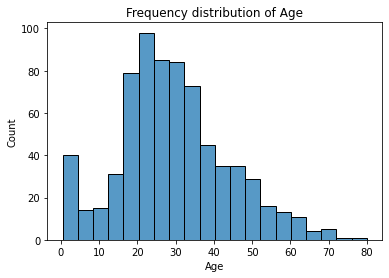

In [9]:
sns.histplot(x='Age',data=df)
plt.title('Frequency distribution of Age')
plt.show()

In [10]:
df['Age'].median()

28.0

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [12]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [13]:
df['Cabin']= df['Cabin'].fillna('U')

In [14]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    2
dtype: int64

In [15]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [16]:
df['Embarked'] = df['Embarked'].fillna('S')
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

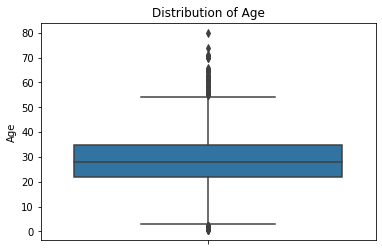

In [17]:
sns.boxplot(y='Age',data=df)
plt.title('Distribution of Age')
plt.show()

In [18]:
Q1 = np.percentile(df['Age'],25,interpolation='midpoint')
Q2 = np.percentile(df['Age'],50,interpolation='midpoint')
Q3 = np.percentile(df['Age'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_limit = Q1 - IQR*1.5
up_limit = Q3 + IQR*1.5
outlier = []
for x in df['Age']:
    if((x > up_limit) or (x < low_limit)):
        outlier.append(x)
ind1 = df['Age']>up_limit
ind2 = df['Age']< low_limit
df.loc[ind1].index | df.loc[ind2].index

C:\Users\BALANANDAN\AppData\Local\Temp\ipykernel_9260\267445309.py:13: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  df.loc[ind1].index | df.loc[ind2].index


Int64Index([  8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,
            171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,
            327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,
            494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,
            673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,
            880],
           dtype='int64', name='PassengerId')

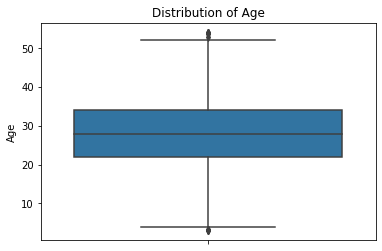

In [19]:
df.drop([8,  12,  16,  17,  34,  55,  79,  95,  97, 117, 120, 153, 165,171, 173, 175, 184, 196, 206, 233, 253, 269, 276, 281, 298, 306,327, 341, 367, 382, 387, 439, 457, 468, 470, 480, 484, 488, 493,494, 531, 546, 556, 571, 588, 626, 627, 631, 643, 645, 648, 660,673, 685, 695, 746, 756, 773, 789, 804, 825, 828, 830, 832, 852,880],inplace = True)
sns.boxplot(y='Age',data=df)
plt.title('Distribution of Age')
plt.show()

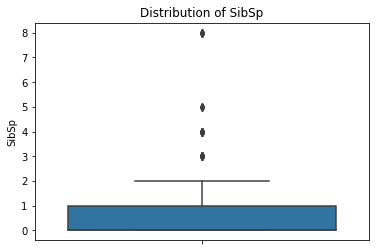

In [20]:
sns.boxplot(y='SibSp',data=df)
plt.title('Distribution of SibSp')
plt.show()

In [21]:
Q1 = np.percentile(df['SibSp'],25,interpolation='midpoint')
Q2 = np.percentile(df['SibSp'],50,interpolation='midpoint')
Q3 = np.percentile(df['SibSp'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_limit = Q1 - IQR*1.5
up_limit = Q3 + IQR*1.5
outlier = []
for x in df['SibSp']:
    if((x > up_limit) or (x < low_limit)):
        outlier.append(x)
ind1 = df['SibSp']>up_limit
df.loc[ind1].index 

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

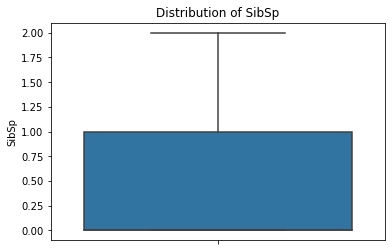

In [22]:
df.drop([25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],inplace = True)
sns.boxplot(y='SibSp',data=df)
plt.title('Distribution of SibSp')
plt.show()

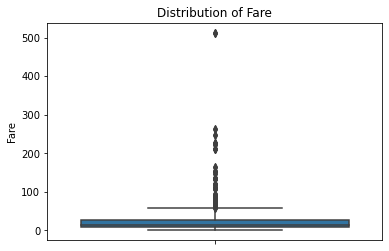

In [23]:
sns.boxplot(y='Fare',data=df)
plt.title('Distribution of Fare')
plt.show()

In [25]:
Q1 = np.percentile(df['Fare'],25,interpolation='midpoint')
Q2 = np.percentile(df['Fare'],50,interpolation='midpoint')
Q3 = np.percentile(df['Fare'],75,interpolation='midpoint')
IQR = Q3 - Q1
low_limit = Q1 - IQR*1.5
up_limit = Q3 + IQR*1.5
outlier = []
for x in df['Fare']:
    if((x > up_limit) or (x < low_limit)):
        outlier.append(x)
ind1 = df['Fare']>up_limit
a = df.loc[ind1].index

In [26]:
print(low_limit,up_limit)

-21.885499999999997 57.5313


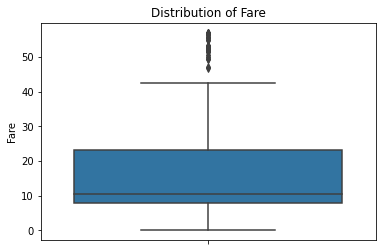

In [27]:
df.drop(a,inplace = True)
sns.boxplot(y='Fare',data=df)
plt.title('Distribution of Fare')
plt.show()

In [28]:
df.shape

(684, 11)

In [29]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [30]:
x = df[['Pclass','Age', 'SibSp', 'Parch','Fare']]
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,2.504386,28.612573,0.271930,0.267544,16.317275
std,0.714816,9.438662,0.500982,0.755690,12.611508
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.062500
max,3.000000,54.000000,2.000000,6.000000,57.000000


In [31]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x_scaled = min_max.fit_transform(x)
x_scaled = pd.DataFrame(x)
x_scaled.columns=['Pclass','Age','SibSp','Parch','Fare']
x_scaled.describe()

,Pclass,Age,SibSp,Parch,Fare
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,2.504386,28.612573,0.271930,0.267544,16.317275
std,0.714816,9.438662,0.500982,0.755690,12.611508
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.062500
max,3.000000,54.000000,2.000000,6.000000,57.000000


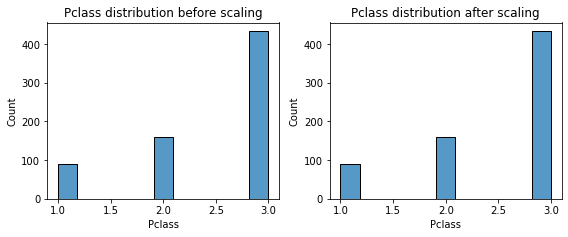

In [32]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
sns.histplot(x='Pclass',data=df)
plt.title("Pclass distribution before scaling")

plt.subplot(2,2,2)
sns.histplot(x='Pclass',data=x_scaled)
plt.title("Pclass distribution after scaling")

plt.tight_layout()

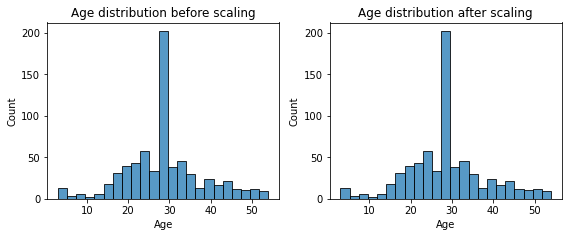

In [33]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
sns.histplot(x='Age',data=df)
plt.title("Age distribution before scaling")

plt.subplot(2,2,2)
sns.histplot(x='Age',data=x_scaled)
plt.title("Age distribution after scaling")

plt.tight_layout()

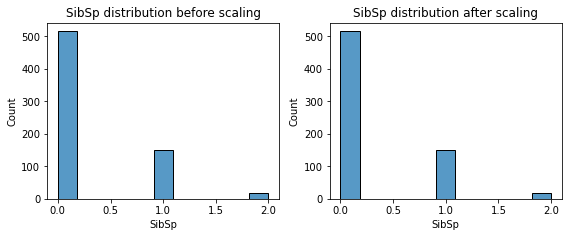

In [34]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
sns.histplot(x='SibSp',data=df)
plt.title("SibSp distribution before scaling")

plt.subplot(2,2,2)
sns.histplot(x='SibSp',data=x_scaled)
plt.title("SibSp distribution after scaling")

plt.tight_layout()


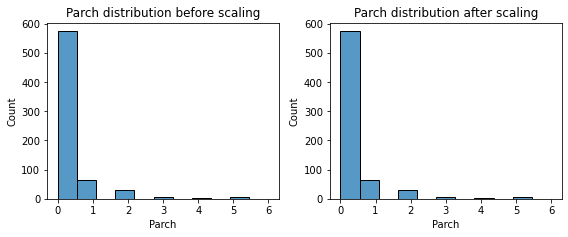

In [35]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
sns.histplot(x='Parch',data=df)
plt.title("Parch distribution before scaling")

plt.subplot(2,2,2)
sns.histplot(x='Parch',data=x_scaled)
plt.title("Parch distribution after scaling")

plt.tight_layout()


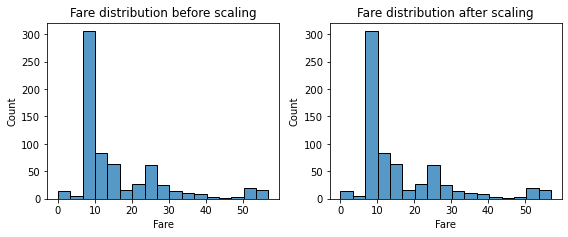

In [36]:
plt.figure(figsize=(8,6))

plt.subplot(2,2,1)
sns.histplot(x='Fare',data=df)
plt.title("Fare distribution before scaling")

plt.subplot(2,2,2)
sns.histplot(x='Fare',data=x_scaled)
plt.title("Fare distribution after scaling")

plt.tight_layout()